In [2]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt


directory = "../data"
file = directory + "/finalpokemon.csv"
csvfile = pd.read_csv(file)
data = pd.DataFrame(csvfile)
print(data.info)
X = pd.DataFrame(data[['hp']], columns=['hp'])
y = pd.Series(data['total_stats'], name='total_stats')
X = sm.add_constant(X)
lin_reg = sm.OLS(y, X.values)

model = lin_reg.fit()
print_model = model.summary()
print()
print(print_model)

<bound method DataFrame.info of        hp  attack  defense  special-attack  special-defense  speed    type_1  \
0      45      49       49              65               65     45     grass   
1      60      62       63              80               80     60     grass   
2      80      82       83             100              100     80     grass   
3      39      52       43              60               50     65      fire   
4      58      64       58              80               65     80      fire   
...   ...     ...      ...             ...              ...    ...       ...   
997    74     130       90             120               60    116     fairy   
998   100     135      115              85              100    135  fighting   
999   100      85      100             135              115    135  electric   
1000   99      83       91             125               83    109     water   
1001   90     130       88              70              108    104     grass   

       

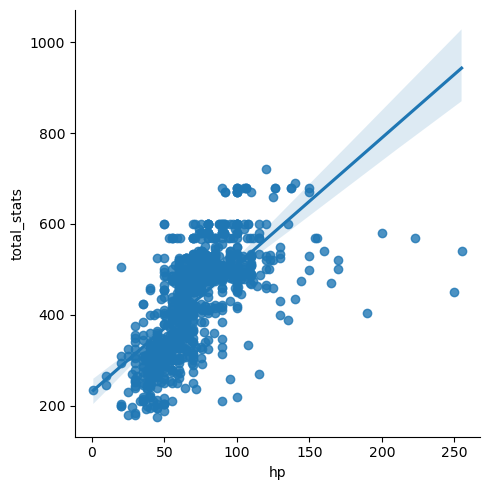

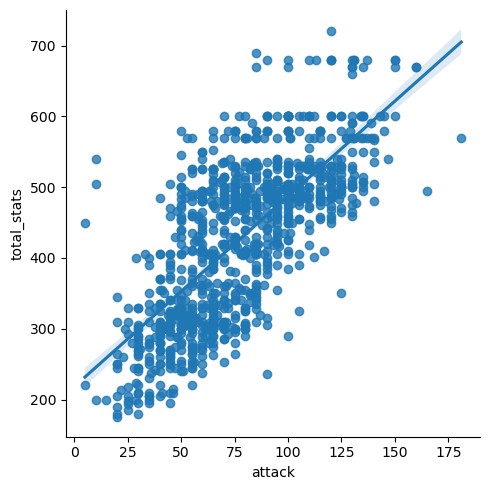

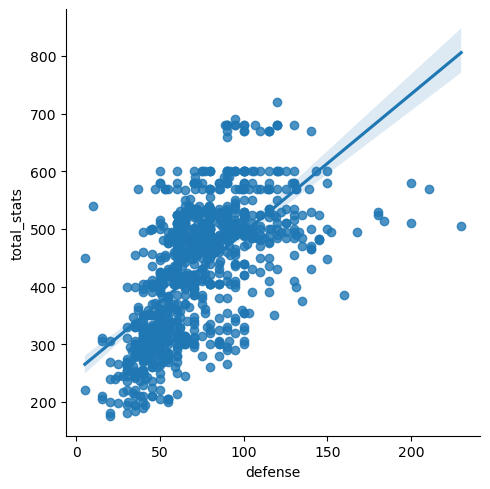

In [3]:
# visualizing with seaborn shows that these are very linearly correlated 
# Plot the regression lines
sns.lmplot(x='hp', y='total_stats', data=data)
sns.lmplot(x='attack', y='total_stats', data=data)
sns.lmplot(x='defense', y='total_stats', data=data)

# Plot the actual data points
# Commented because they interfere with visual presentation of last lmplot
# sns.scatterplot(x='hp', y='total_stats', data=data)
# sns.scatterplot(x='attack', y='total_stats', data=data)
# sns.scatterplot(x='defense', y='total_stats', data=data)

# Show the plots
plt.show()


In [5]:
# Interpretation
# As we can see, these attributes are clearly correlated positively with totalstat
# We can reject the null hypothesis that these variables have no effect because the p value is so 
# low it was rounded off to zero

In [4]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load the dataset
directory = "../data"
file = directory + "/finalpokemon.csv"
csvfile = pd.read_csv(file)
data = pd.DataFrame(csvfile)

# Select the features and target variable
X = data[['hp']]
y = data['total_stats']

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value
lasso_model.fit(X, y)
lasso_predictions = lasso_model.predict(X)
lasso_rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
print("Lasso RMSE:", lasso_rmse)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value
ridge_model.fit(X, y)
ridge_predictions = ridge_model.predict(X)
ridge_rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
print("Ridge RMSE:", ridge_rmse)


Lasso RMSE: 84.2173807066394
Ridge RMSE: 84.21738062315568
